<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

The dataset I am using is a list of current City of Chicago employees with their titles and salaries. I chose this datast because I used to be an employeee of the City of Chicago (albeit as a teacher which is not included in this dataset). I'm curious which departments tend to make a lot of money, especially given press about unions (e.g. Fraternal Order of Police).

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [96]:
import pandas as pd
df = pd.read_csv("/Users/gavrielsteinmetz-silber/Desktop/Current_Employee_Names__Salaries__and_Position_Titles.csv")

# First, let's look at the head
print(df.head())
# All these rows happen to be from the police department. Let's see all the departments in the dataset
print(df["Department"].unique())
# Now let's see some basic summary statistics:
print(df.describe())
#This data all seems to make sense. Let's view a few stats of annual salary based on department:
grouped_stats = (df.groupby("Department")["Annual Salary"].agg(["mean", "median", "min", "max"]))
print(grouped_stats.sort_values(by = "median", ascending=False))

# Let's also see if there are any missing values: 
print(df.isna().sum())

# That makes total sense. Hours and hourly rates won't be listed for salaried workers; salaries won't be listed for hourly workers. 

                  Name  Job Titles            Department Full or Part-Time  \
0    ALDERDEN, JACOB M     CAPTAIN  DEPARTMENT OF POLICE                 F   
1     SHALABI, MAJDI A    SERGEANT  DEPARTMENT OF POLICE                 F   
2        KELLY, LUKE L  LIEUTENANT  DEPARTMENT OF POLICE                 F   
3  FORSELL, JEREMIAH L    SERGEANT  DEPARTMENT OF POLICE                 F   
4     SCHNOOR, KELLY A  LIEUTENANT  DEPARTMENT OF POLICE                 F   

  Salary or Hourly  Typical Hours  Annual Salary  Hourly Rate  
0           SALARY            NaN       159552.0          NaN  
1           SALARY            NaN       133860.0          NaN  
2           SALARY            NaN       150318.0          NaN  
3           SALARY            NaN       129666.0          NaN  
4           SALARY            NaN       141552.0          NaN  
['DEPARTMENT OF POLICE' 'DAIS' 'DEPARTMENT OF FINANCE'
 'CHICAGO PUBLIC LIBRARY' 'FIRE DEPARTMENT'
 'CHICAGO DEPT OF TRANSPORTATION' 'DEPT STREETS 

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [97]:
# First things first, in order to make fair comparisons of pay, I only want to look at workers with annual salaries: 
df = df[df["Salary or Hourly"] == "SALARY"] 

# Now we can drop the hourly-related columns: 
df = df.drop(["Typical Hours", "Hourly Rate", "Full or Part-Time"], axis = 1)

# Now there should be no missing values: 
print(df.isna().sum()) 

# And that looks good. Now, let's get a sense of how many rows there actually are for different departmments
counts = (df["Department"].value_counts())
print(counts)

#There's a huge range of counts and this is really non-ideal for comparing. Let's just look at departments that represent over 350 rows
df = df[df['Department'].isin(counts[counts > 350].index)]

df.describe()
# Despite all our filtering, we only have around 3,500 fewer salary rows than we started with. We now have a total of 21,158 rows--and it is now more appropriate to compare different departments.

Name                0
Job Titles          0
Department          0
Salary or Hourly    0
Annual Salary       0
dtype: int64
Department
DEPARTMENT OF POLICE                          12326
FIRE DEPARTMENT                                4738
DEPARTMENT OF AVIATION                          767
CHICAGO PUBLIC LIBRARY                          746
OFFICE OF EMERGENCY MANAGEMENT                  678
DEPARTMENT OF PUBLIC HEALTH                     674
DEPARTMENT OF FINANCE                           479
DEPT OF WATER MANAGEMENT                        377
CHICAGO DEPT OF TRANSPORTATION                  373
FAMILY AND SUPPORT SERVICES                     335
DEPARTMENT OF LAW                               327
DEPT STREETS AND SANITATION                     318
CITY COUNCIL                                    286
DAIS                                            236
PUBLIC SAFETY ADMINISTRATION                    233
DEPT OF BUILDINGS                               228
BUS AFFAIRS AND CONSUMER PROT     

,Annual Salary
count,21158.000000
mean,101325.568772
std,23431.914166
min,37116.000000
25%,90540.000000
50%,101412.000000
75%,111966.000000
max,283200.000000


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



### Visualizations: Introduction

There are two visualizations I'm quite interested in. First, I would like to see just the number of salaried employees in these departments. Second, I would like to see the salaries in a box plot. This will show us the different quantiles as well as the IQR and outliers for each departmnet. 

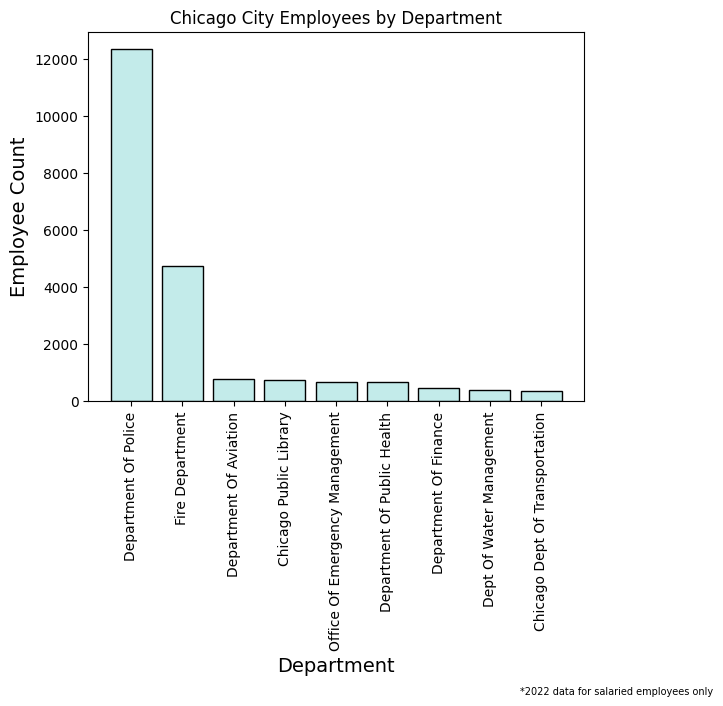

In [144]:
# Part 1a: matplotlib - bar plot

#As aforementioned, this plot will visualize the number of employees in the different departments. The departments are on the x-axis; the counts are on the y-axis.
import matplotlib.pyplot as plt
dept_counts = df["Department"].str.title().value_counts()

plt.bar(dept_counts.index, dept_counts, color = "#C3EBEA", edgecolor = "black") #adding custom color
plt.xlabel("Department", fontsize=14) #labeling and changing font size
plt.ylabel("Employee Count", fontsize=14) #labeling and changing font size
plt.title("Chicago City Employees by Department")
plt.xticks(rotation = "vertical") #rotating tick labels so they're comprehensible
plt.figtext(0.8, -.5, "*2022 data for salaried employees only", fontsize = 7) #adding footnote
plt.show()

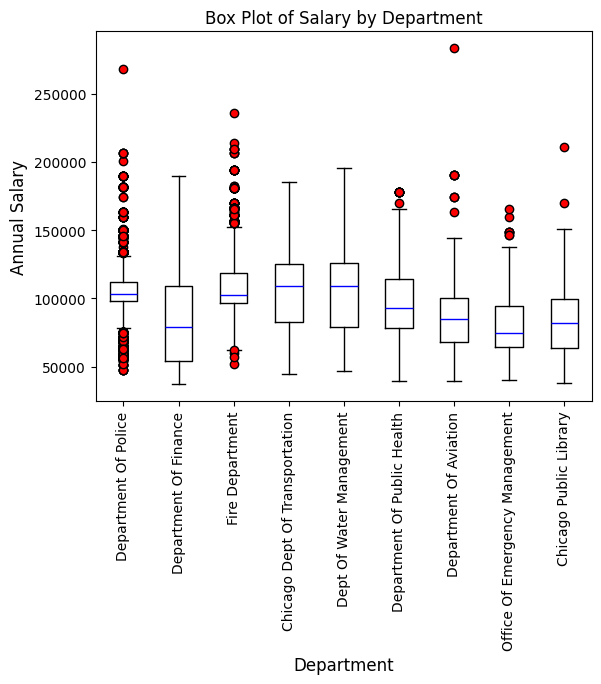

In [244]:
#Part 1b: matplotlib - box plot

# This plot visualizes the distribution of salaries in differnt departments. The horizantal lines represent the medians, the boxes represent the IQRs, the whiskers extend in each direction by 1.5 times the IQR, and circles repersent outliers.

#The data values can be a list, so I'll create that (essentially a list of lists)
unique_departments = df['Department'].unique()
department_salary_lists = [df[df['Department'] == dep]['Annual Salary'].tolist() for dep in unique_departments]

plt.boxplot(department_salary_lists, 
    medianprops=dict(color="blue"), #change outlier color
    flierprops = dict(markerfacecolor = "red")) #change median line color

plt.title("Box Plot of Salaries by Department")
plt.xlabel("Chicago Department", fontsize=12) #adding xlabel, changing size
plt.ylabel("Annual Salary", fontsize=12) #adding ylabel, changing size

# I want the department names on the first tick mark through the nth +1 tick mark where n is the number of departments. I also need to rotate the text so that it's commprehnsible.

plt.xticks(range(1, len(unique_departments) + 1), unique_departments, rotation = "vertical") 
plt.show()



/var/folders/28/xsh6qgd908q5ng87yxcxs6300000gn/T/ipykernel_85238/2904149798.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gfg.set_xticklabels(gfg.get_xticklabels(), rotation = 90)


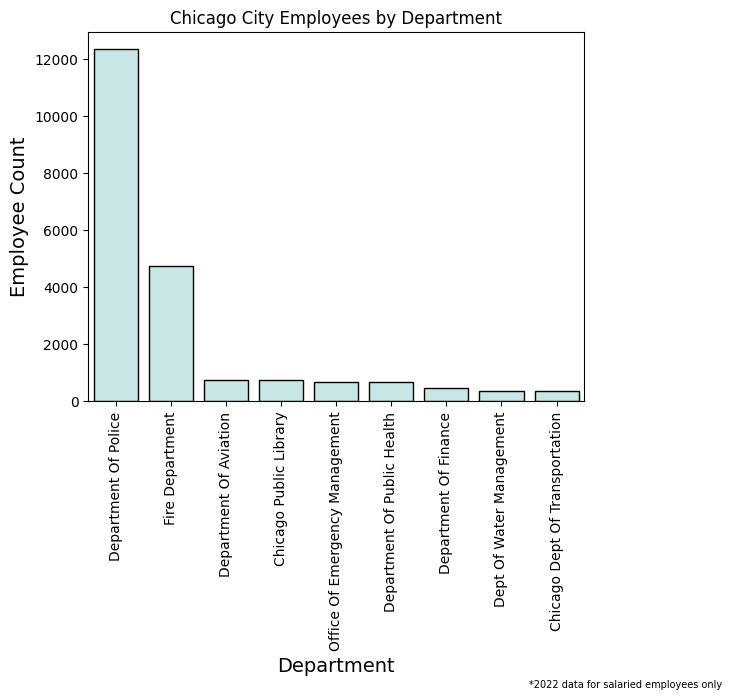

In [245]:
# Part 2a: seaborn - bar plot

import seaborn as sns 
df["Department"] = df["Department"].str.title()

#I need to leverage the dept_counts to make sure the order is right. That requires an actual column called "Department"
dept_counts = df["Department"].value_counts().reset_index()
dept_counts.columns = ["Department", "Count"]

gfg = sns.countplot(x = "Department", data = df,  color = "#C3EBEA", edgecolor="black", order = dept_counts["Department"]) #note: needed to specify order to make it identical to the above plot.
gfg.set_title("Chicago City Employees by Department")
gfg.set_xlabel("Department", fontsize=14) 
gfg.set_ylabel("Employee Count", fontsize=14)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation = 90)
gfg.text(7.5, -10000, "*2022 data for salaried employees only", fontsize = 7)

plt.show()


/var/folders/28/xsh6qgd908q5ng87yxcxs6300000gn/T/ipykernel_85238/1409766068.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gfg.set_xticklabels(gfg.get_xticklabels(), rotation = 90)


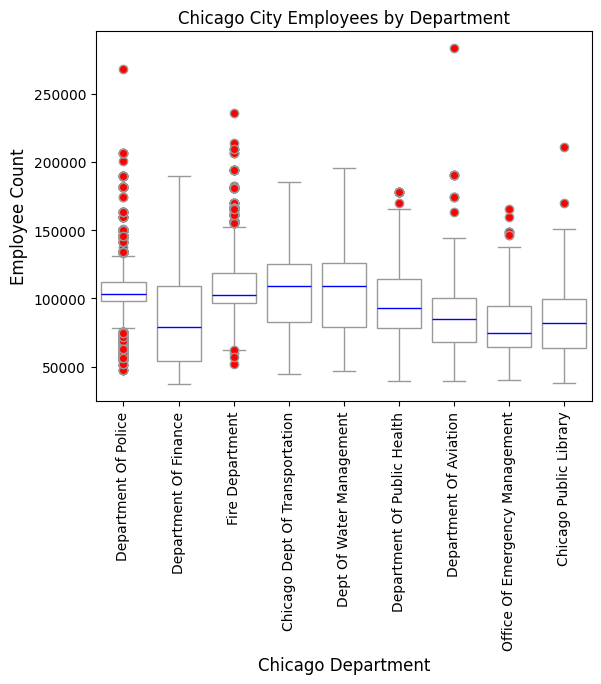

In [257]:
# Part 2b: seaborn - box plot

gfg = sns.boxplot(x = "Department", y = "Annual Salary", data = df, color = "white",
    medianprops=dict(color="blue"), #change outlier colorr
    flierprops = dict(markerfacecolor = "red")) #change median line color)

gfg.set_title("Chicago City Employees by Department")
gfg.set_xlabel("Chicago Department", fontsize=12) 
gfg.set_ylabel("Employee Count", fontsize=12)
gfg.set_xticklabels(gfg.get_xticklabels(), rotation = 90)
plt.show()


# Part 3 and Conclusions  

In this sections, I'll briefly touch on the differrent processes creating plots in matplotlib and seaborn, and then I'll discuss my takeaways from the visualizations.

First, creating a simple version of the plots was much easier in seaborn than matplotlib. For example, I instantly created a rudimentary version of the box plot in seaborn, but I had to form a list of lists before I could even get started in matplotlib. I had a similar experience with the bar plot; the basic version of the bar plot I wanted was remarkably easy to make in seaborn but slightly more tedious in matplotlib. 

Second, though, customizing the plots was much easier in matplotlib than it was in seaborn. Taking a look at the docucmentation allowed me to quickly touch up on the plots in matplotlib. In seaborn, the process was tedious. In fact, in my final seaborn plot I tried to create blacck outlines (edgecolor) and after quite some time research, concluded that this was not possible through seaborn (they remain grey). In the future, I intend to rely heavily on seaborn for quick visualizations while I'm exploring data. Howeverr, I'll likely rely more on matplotlib if I need a visual to be quite precise. 

In terms of the visualizations, they allowed for a number of interesting takeaways. These include:


1. With respect to the departments in this dataset, the Chicago Police Department and Fire Department collectively constitute the vast majority of salaried roles. And there are far moree salaried employees of the Police Department than there are of the Fire Departmenet.

2. Median salaries are fairly similar across departments (typically a little under $100,000). However, salaried workers at the Department of Fiannce and the Office of Emergency Management have a median salary closer to $75,000. 

3. The Police Department and Fire Department have a number of outliers. This is likely (in part) due to the fact that there are simply more workers in these departments. However, it's worth noting that there are workers making over $200,000 in both departments (even one visible outlier at around $260,000). In addition, there's one extremely high outlier at the Department of Aviation (probably around $280,000).

My recommendations are to add the data fromm the Board of Education as well. Then, I would be curious if union activity for each department could be quantified and potentially correlated with salary data. This would speak to the efficacy of unions in general as well as in these particular cases.